<a href="https://colab.research.google.com/github/parthpendal/Machine-Learning-Projects/blob/main/AB_Testing_Case_Study.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.stats.proportion import proportions_ztest,proportion_confint
import scipy.stats as st

# Loading, cleaning and analyzing file df_final_demo.txt

In [ ]:
# Loading file to the dataframe
df_final_demo=pd.read_csv("df_final_demo.txt")
print(df_final_demo.head())
print(df_final_demo.shape)

   client_id  clnt_tenure_yr  ...  calls_6_mnth  logons_6_mnth
0     836976             6.0  ...           6.0            9.0
1    2304905             7.0  ...           6.0            9.0
2    1439522             5.0  ...           6.0            9.0
3    1562045            16.0  ...           3.0            6.0
4    5126305            12.0  ...           0.0            3.0

[5 rows x 9 columns]
(70609, 9)


In [ ]:
#Checking how may values are na and see if they are significantly high
df_final_demo.isna().sum()

client_id            0
clnt_tenure_yr      14
clnt_tenure_mnth    14
clnt_age            15
gendr               14
num_accts           14
bal                 14
calls_6_mnth        14
logons_6_mnth       14
dtype: int64

In [ ]:
#We will not remove these records since they have records in control and test group. 
#Also, count is NOT significantly high compared to the record counts.
df_final_demo[df_final_demo.bal.isnull()]

,client_id,clnt_tenure_yr,clnt_tenure_mnth,clnt_age,gendr,num_accts,bal,calls_6_mnth,logons_6_mnth
4164,7402828,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8316,355337,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8677,8412164,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
13444,2222915,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
18066,4876926,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25961,5277910,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
28432,7616759,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
35323,8191345,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
43518,1227228,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
46076,8611797,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
# Analyzing possible incorrect value for Gender column and correcting them
print(df_final_demo.gendr.value_counts(dropna=False))

U      24122
M      23724
F      22746
NaN       14
X          3
Name: gendr, dtype: int64


In [ ]:
#Replacing gender value X and nan with unknown
df_final_demo.gendr=df_final_demo.gendr.replace(['X',np.nan],'U')
print(df_final_demo.gendr.value_counts(dropna=False))

U    24139
M    23724
F    22746
Name: gendr, dtype: int64


In [ ]:
#Checking values for num_accts
print(df_final_demo.num_accts.value_counts(dropna=False))

2.0    55497
3.0    12529
4.0     2241
5.0      284
6.0       33
NaN       14
7.0        8
1.0        2
8.0        1
Name: num_accts, dtype: int64


# Who currently engages Vanguard via this process?

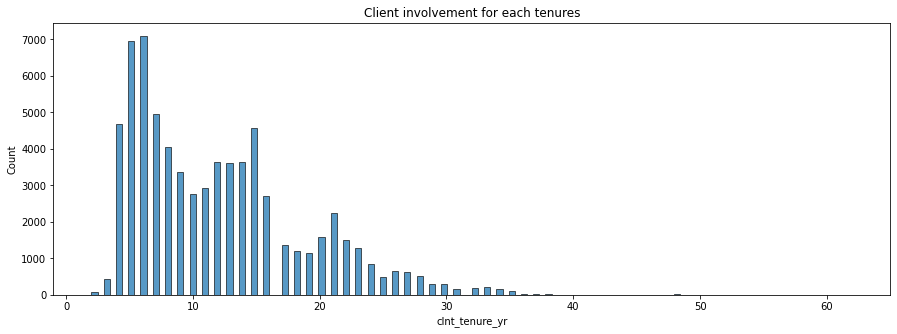

In [ ]:
#Understanding client spread by tenure
plt.figure(figsize=(15,5))
sns.histplot(data=df_final_demo,x="clnt_tenure_yr")
plt.title("Client involvement for each tenures")
plt.show()

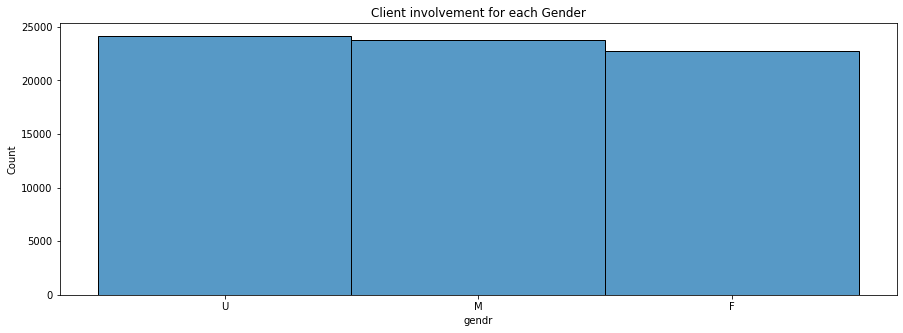

In [ ]:
#Understanding client spread by Gender
plt.figure(figsize=(15,5))
sns.histplot(data=df_final_demo,x="gendr")
plt.title("Client involvement for each Gender")
plt.show()

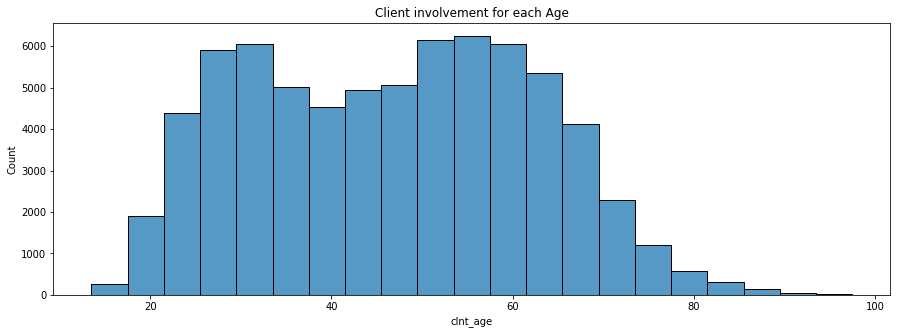

In [ ]:
#Understanding client spread by Age
plt.figure(figsize=(15,5))
sns.histplot(data=df_final_demo,x="clnt_age",binwidth=4)
plt.title("Client involvement for each Age")
plt.show()

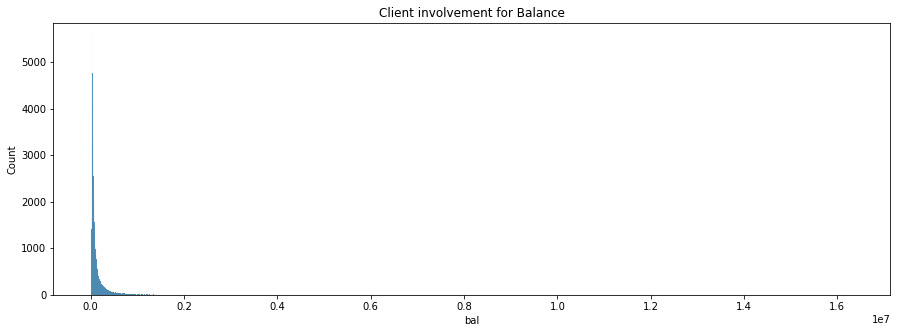

In [ ]:
#Understanding client spread by balance
plt.figure(figsize=(15,5))
sns.histplot(data=df_final_demo,x="bal")
plt.title("Client involvement for Balance")
plt.show()

# Loading, cleaning and analyzing df_final_experiment_clients

In [ ]:
#Reading file into a dataframe
df_final_experiment_clients=pd.read_csv("df_final_experiment_clients.txt")
df_final_experiment_clients.head()

,client_id,Variation
0,9988021,Test
1,8320017,Test
2,4033851,Control
3,1982004,Test
4,9294070,Control


In [ ]:
# Validating for null values
print("Null vallues for Client Id:",df_final_experiment_clients.client_id.isna().sum())
print("Null vallues for Variation:",df_final_experiment_clients.Variation.isna().sum())

Null vallues for Client Id: 0
Null vallues for Variation: 20109


In [ ]:
#Reviewing various values for Variations 
df_final_experiment_clients.Variation.value_counts(dropna=False)

Test       26968
Control    23532
NaN        20109
Name: Variation, dtype: int64

In [ ]:
#We will drop records for NaN since they are not relavent for our experiments
df_final_experiment_clients=df_final_experiment_clients.dropna()
print("df_final_experiment_clients.Variation.value_counts(dropna=False))")
print("Dataframe shape:",df_final_experiment_clients.shape)

df_final_experiment_clients.Variation.value_counts(dropna=False))
Dataframe shape: (50500, 2)


# Loading, cleaning and analyzing df_final_web_data1 and df_final_web_data2

In [ ]:
# Loading file to dataframe, checking first 5 records. 
df_final_web_data1=pd.read_csv("df_final_web_data_pt_1.txt",parse_dates=["date_time"])
df_final_web_data1.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:27:07
1,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:26:51
2,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:19:22
3,9988021,580560515_7732621733,781255054_21935453173_531117,step_2,2017-04-17 15:19:13
4,9988021,580560515_7732621733,781255054_21935453173_531117,step_3,2017-04-17 15:18:04


In [ ]:
#Checking data type. Ensuring date_time has appropriate datatype
df_final_web_data1.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [ ]:
# Loading file to dataframe, reviewing first 5 records.
df_final_web_data2=pd.read_csv("df_final_web_data_pt_2.txt",parse_dates=["date_time"])
df_final_web_data2.head()

,client_id,visitor_id,visit_id,process_step,date_time
0,763412,601952081_10457207388,397475557_40440946728_419634,confirm,2017-06-06 08:56:00
1,6019349,442094451_91531546617,154620534_35331068705_522317,confirm,2017-06-01 11:59:27
2,6019349,442094451_91531546617,154620534_35331068705_522317,step_3,2017-06-01 11:58:48
3,6019349,442094451_91531546617,154620534_35331068705_522317,step_2,2017-06-01 11:58:08
4,6019349,442094451_91531546617,154620534_35331068705_522317,step_1,2017-06-01 11:57:58


In [ ]:
 #Checking data type. Ensuring date_time has appropriate datatype
 df_final_web_data2.dtypes

client_id                int64
visitor_id              object
visit_id                object
process_step            object
date_time       datetime64[ns]
dtype: object

In [ ]:
# Filtering the records based on the experiment run dates. We would not use record outsize date range 2017-03-15 and 2020-04-30.
df_date_filtered_activity_set1 = df_final_web_data1.loc[(df_final_web_data1['date_time'] >= '2017-03-15')
                     & (df_final_web_data1['date_time'] <= '2020-04-30')]
df_date_filtered_activity_set1.shape

(343141, 5)

In [ ]:
# Filtering the records based on the experiment run dates. We would not use record outsize date range 2017-03-15 and 2020-04-30.
df_date_filtered_activity_set2 = df_final_web_data2.loc[(df_final_web_data2['date_time'] >= '2017-03-15')
                     & (df_final_web_data2['date_time'] <= '2017-04-30')]
df_date_filtered_activity_set2.shape

(0, 5)

From above result, we can assume that records from file df_final_web_data_pt_2 is not useful for our analysis since dates fall outside of our experiment date range.

# Joining data of df_final_experiment_clients and df_date_filtered_activity_set to segregate records for control and test group

In [ ]:
#Joining the clients and df_date_filtered_activity_set1
df_final_set1=df_final_experiment_clients.merge(df_date_filtered_activity_set1,how='inner',on=['client_id'])
print(df_final_set1.Variation.value_counts())
print("Null vaiations:",df_final_set1.Variation.isnull().sum())
print(df_final_set1.head(5))
print(df_final_set1.shape)


Test       139691
Control    101537
Name: Variation, dtype: int64
Null vaiations: 0
   client_id Variation  ... process_step           date_time
0    9988021      Test  ...       step_3 2017-04-17 15:27:07
1    9988021      Test  ...       step_2 2017-04-17 15:26:51
2    9988021      Test  ...       step_3 2017-04-17 15:19:22
3    9988021      Test  ...       step_2 2017-04-17 15:19:13
4    9988021      Test  ...       step_3 2017-04-17 15:18:04

[5 rows x 6 columns]
(241228, 6)


#Validating that bias is not introduced in error

In [ ]:
# Merging client details data with activity data
df_Merged_Client_Variant=df_final_demo.merge(df_final_set1, how='inner',on="client_id")
df_Merged_Client_Variant.shape

(241228, 14)

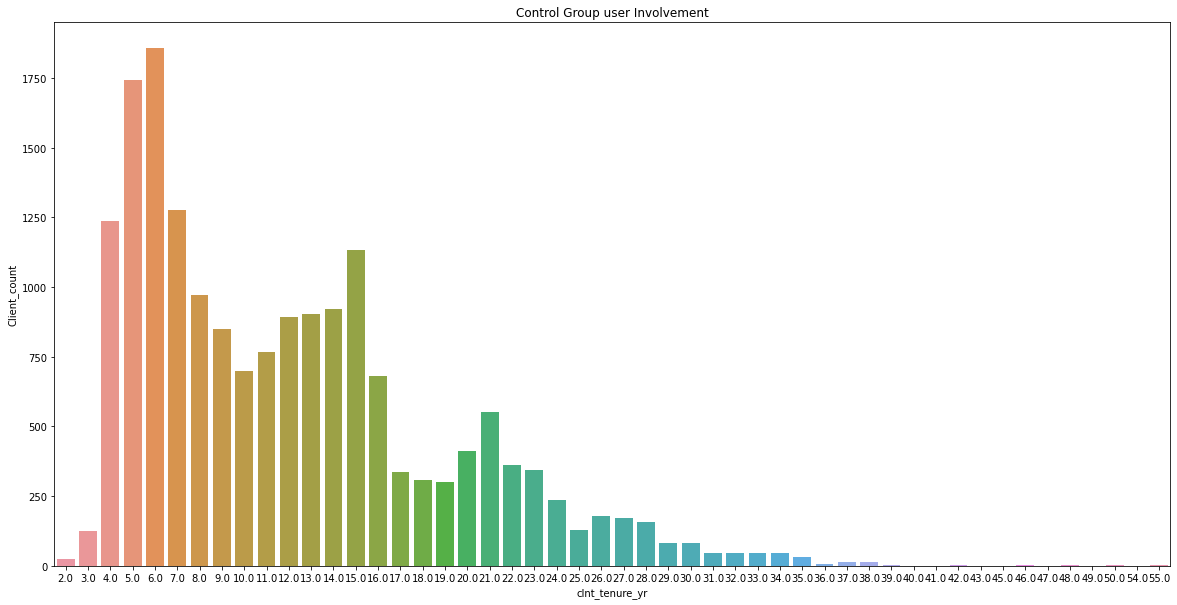

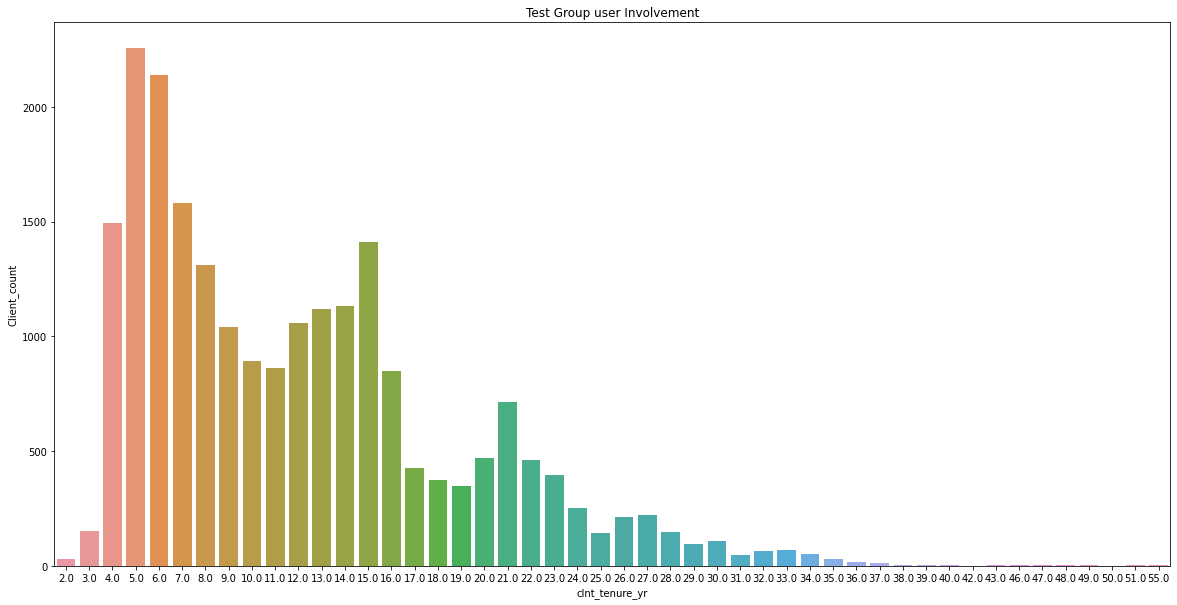

In [ ]:
#Identifying Client Tenure vs number of clients in Control and Test group
df_Control_Involved_User_By_Tenure=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Control'][["clnt_tenure_yr","client_id"]]
df_Control_Involved_User_By_Tenure=df_Control_Involved_User_By_Tenure.groupby(by="clnt_tenure_yr",as_index=False).agg({"client_id": "nunique"})
df_Control_Involved_User_By_Tenure.columns=["clnt_tenure_yr","Client_count"]
plt.figure(figsize=(20,10))
sns.barplot(x="clnt_tenure_yr",y="Client_count",data=df_Control_Involved_User_By_Tenure)
plt.title("Control Group user Involvement")
plt.show()

df_Test_Involved_User_By_Tenure=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Test'][["clnt_tenure_yr","client_id"]].drop_duplicates()
df_Test_Involved_User_By_Tenure=df_Test_Involved_User_By_Tenure.groupby(by="clnt_tenure_yr",as_index=False).count()
df_Test_Involved_User_By_Tenure.columns=["clnt_tenure_yr","Client_count"]
plt.figure(figsize=(20,10))
sns.barplot(x="clnt_tenure_yr",y="Client_count",data=df_Test_Involved_User_By_Tenure)
plt.title("Test Group user Involvement")
plt.show()

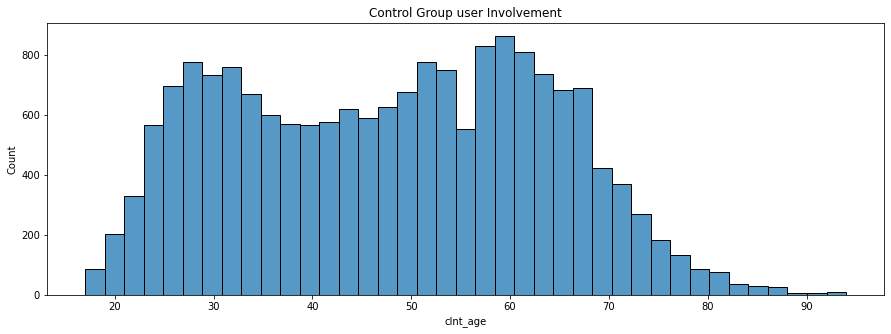

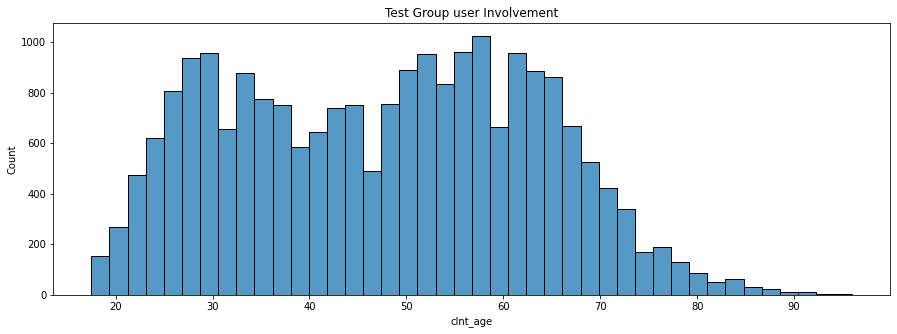

In [ ]:
#Identifying Client age vs number of clients in Control and Test group
df_Control_Involved_User_By_Age=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Control'][["clnt_age","client_id"]].drop_duplicates()
plt.figure(figsize=(15,5))
sns.histplot(data=df_Control_Involved_User_By_Age,x="clnt_age")
plt.title("Control Group user Involvement")
plt.show()


df_Test_Involved_User_By_Age=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Test'][["clnt_age","client_id"]].drop_duplicates()
plt.figure(figsize=(15,5))
sns.histplot(data=df_Test_Involved_User_By_Age,x="clnt_age")
plt.title("Test Group user Involvement")
plt.show()

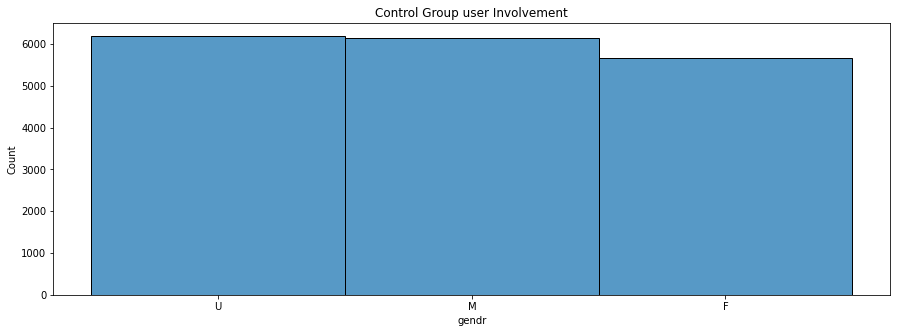

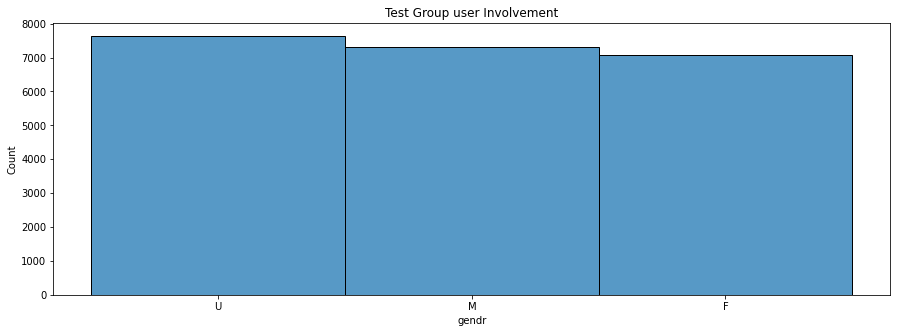

In [ ]:
#Identifying gender vs number of clients in Control and Test group
df_Control_Involved_User_By_Gender=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Control'][["gendr","client_id"]].drop_duplicates()
plt.figure(figsize=(15,5))
sns.histplot(data=df_Control_Involved_User_By_Gender,x="gendr")
plt.title("Control Group user Involvement")
plt.show()


df_Test_Involved_User_By_Gender=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Test'][["gendr","client_id"]].drop_duplicates()
plt.figure(figsize=(15,5))
sns.histplot(data=df_Test_Involved_User_By_Gender,x="gendr")
plt.title("Test Group user Involvement")
plt.show()

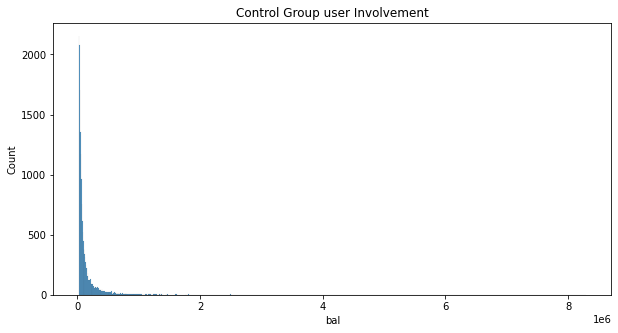

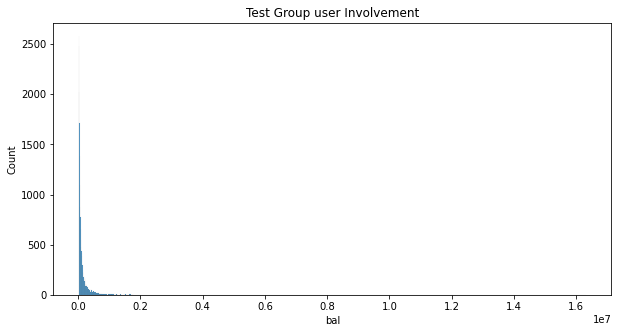

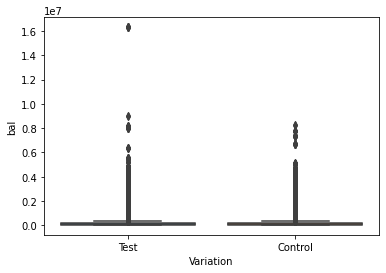

In [ ]:
#Identifying Client balance vs number of clients in Control and Test group
df_Control_Involved_User_By_Balance=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Control'][["bal","client_id"]].drop_duplicates()
plt.figure(figsize=(10,5))
sns.histplot(data=df_Control_Involved_User_By_Balance,x="bal",bins='auto')
plt.title("Control Group user Involvement")
plt.show()

df_Test_Involved_User_By_Balance=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Test'][["bal","client_id"]].drop_duplicates()
plt.figure(figsize=(10,5))
sns.histplot(data=df_Test_Involved_User_By_Balance,x="bal",bins='auto')
plt.title("Test Group user Involvement")
plt.show()

sns.boxplot(x="Variation", y="bal", data=df_Merged_Client_Variant)

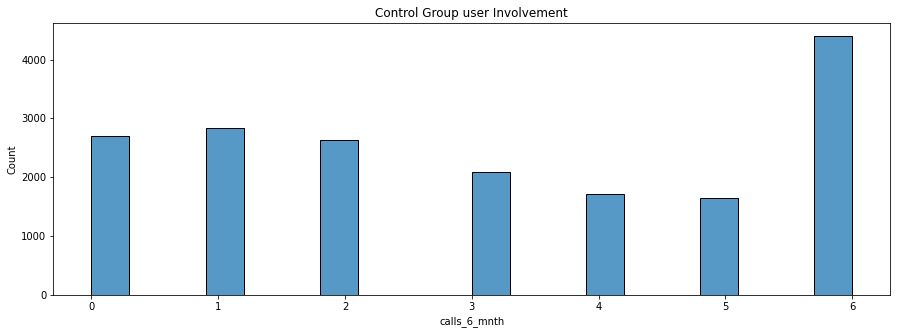

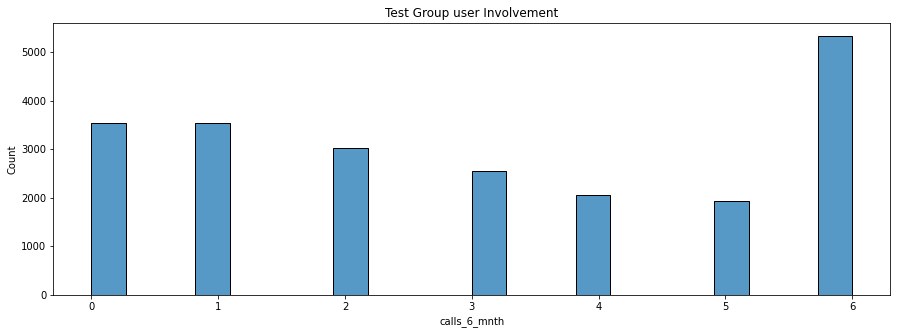

In [ ]:
#Identifying calls vs number of clients in Control and Test group
df_Control_Involved_User_By_calls=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Control'][["calls_6_mnth","client_id"]].drop_duplicates()
plt.figure(figsize=(15,5))
sns.histplot(data=df_Control_Involved_User_By_calls,x="calls_6_mnth")
plt.title("Control Group user Involvement")
plt.show()


df_Test_Involved_User_By_calls=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Test'][["calls_6_mnth","client_id"]].drop_duplicates()
plt.figure(figsize=(15,5))
sns.histplot(data=df_Test_Involved_User_By_calls,x="calls_6_mnth")
plt.title("Test Group user Involvement")
plt.show()

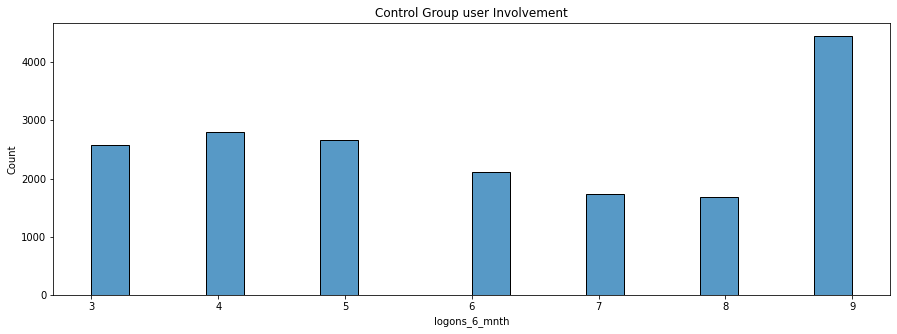

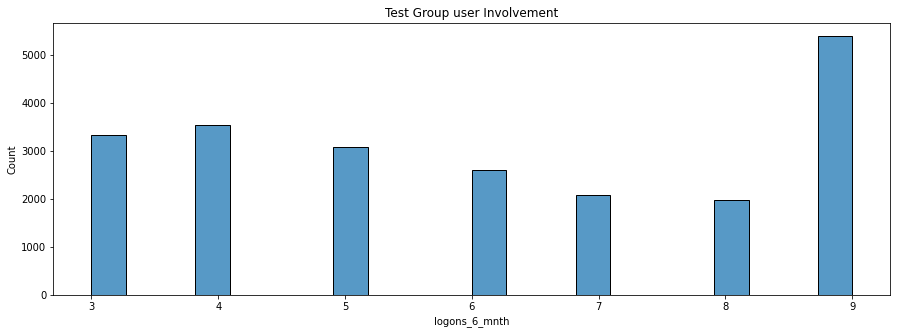

In [ ]:
#Identifying logons vs number of clients in Control and Test group
df_Control_Involved_User_By_logons=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Control'][["logons_6_mnth","client_id"]].drop_duplicates()
plt.figure(figsize=(15,5))
sns.histplot(data=df_Control_Involved_User_By_logons,x="logons_6_mnth")
plt.title("Control Group user Involvement")
plt.show()


df_Test_Involved_User_By_logons=df_Merged_Client_Variant[df_Merged_Client_Variant.Variation=='Test'][["logons_6_mnth","client_id"]].drop_duplicates()
plt.figure(figsize=(15,5))
sns.histplot(data=df_Test_Involved_User_By_logons,x="logons_6_mnth")
plt.title("Test Group user Involvement")
plt.show()

# Analyzing the difference in the way in which Test and control group is accessing UI

Control Group Statisstics
          client_id          size
count  1.801500e+04  18015.000000
mean   5.023261e+06      5.636248
std    2.878017e+06      3.746871
min    1.028000e+03      1.000000
25%    2.517986e+06      4.000000
50%    5.048422e+06      5.000000
75%    7.481610e+06      7.000000
max    9.998921e+06     55.000000


Test Group Statisstics
          client_id          size
count  2.201300e+04  22013.000000
mean   5.004994e+06      6.345841
std    2.879126e+06      3.839195
min    5.550000e+02      1.000000
25%    2.517465e+06      5.000000
50%    5.032514e+06      5.000000
75%    7.482600e+06      7.000000
max    9.999729e+06     64.000000


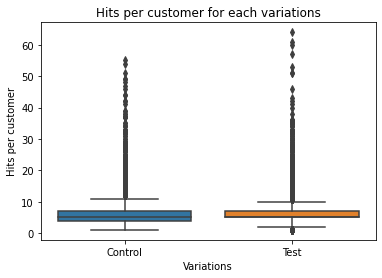

In [ ]:
#Trying to summarize how number of hits per customer
df_Control_user_data=df_final_set1[(df_final_set1.Variation=='Control') ]
df_Control_hit_per_user=df_Control_user_data.groupby(by=["client_id","Variation"],axis=0,as_index=False).size()
print("Control Group Statisstics")
print(df_Control_hit_per_user.describe())

df_Test_user_data=df_final_set1[(df_final_set1.Variation=='Test') ]
df_Test_hit_per_user=df_Test_user_data.groupby(by=["client_id","Variation"],axis=0,as_index=False).size()
print("\n\nTest Group Statisstics")
print(df_Test_hit_per_user.describe())

sns.boxplot(x="Variation", y="size", data=pd.concat([df_Control_hit_per_user, df_Test_hit_per_user]))
plt.title("Hits per customer for each variations")
plt.xlabel("Variations")
plt.ylabel("Hits per customer")
plt.show()

Mean values number of hits per user is higher for Test group compared to the Control group.

          client_id          size
count  7.147100e+04  71471.000000
mean   5.022336e+06      1.420674
std    2.877637e+06      1.260468
min    1.028000e+03      1.000000
25%    2.523164e+06      1.000000
50%    5.038429e+06      1.000000
75%    7.486042e+06      1.000000
max    9.998921e+06     46.000000
          client_id          size
count  9.167700e+04  91677.000000
mean   5.001264e+06      1.523730
std    2.881278e+06      1.198536
min    5.550000e+02      1.000000
25%    2.507991e+06      1.000000
50%    5.040493e+06      1.000000
75%    7.468519e+06      2.000000
max    9.999729e+06     35.000000


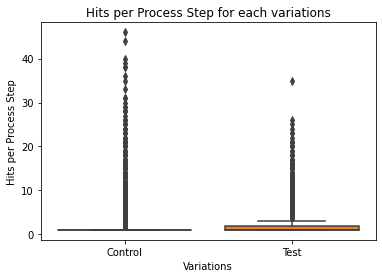

In [ ]:
#Trying to dtermine number of hits per user, process steps 
df_Control_hit_per_step=df_Control_user_data.groupby(by=["client_id","process_step","Variation"],axis=0,as_index=False).size()
print(df_Control_hit_per_step.describe())
df_Test_hit_per_step=df_Test_user_data.groupby(by=["client_id","process_step","Variation"],axis=0,as_index=False).size()
print(df_Test_hit_per_step.describe())

sns.boxplot(x="Variation", y="size", data=pd.concat([df_Control_hit_per_step, df_Test_hit_per_step]))
plt.title("Hits per Process Step for each variations")
plt.xlabel("Variations")
plt.ylabel("Hits per Process Step")
plt.show()

               size
count  23323.000000
mean       4.353514
std        2.708680
min        1.000000
25%        2.000000
50%        5.000000
75%        5.000000
max       39.000000
               size
count  28769.000000
mean       4.855608
std        2.919600
min        1.000000
25%        3.000000
50%        5.000000
75%        6.000000
max       61.000000


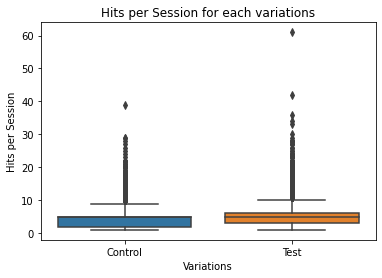

In [ ]:
#Trying to dtermine number of hits per session
df_Control_hit_per_session=df_Control_user_data.groupby(by=["visit_id","Variation"],axis=0,as_index=False).size()
print(df_Control_hit_per_session.describe())
df_Test_hit_per_session=df_Test_user_data.groupby(by=["visit_id","Variation"],axis=0,as_index=False).size()
print(df_Test_hit_per_session.describe())

sns.boxplot(x="Variation", y="size", data=pd.concat([df_Control_hit_per_session, df_Test_hit_per_session]))
plt.title("Hits per Session for each variations")
plt.xlabel("Variations")
plt.ylabel("Hits per Session")
plt.show()

Above graph shows higher customer involvement.

# For the experimental new process, how can its success be measured?

In [ ]:
#Success can be measured by ratio of customers reached final step out of the clients who initiated start step

# How did the new process perform?

In [ ]:
# Finding number of users involved in each process step for Control group
df_control_conversion_metrics=df_final_set1[(df_final_set1.Variation=='Control') ][["client_id","process_step"]].drop_duplicates()["process_step"].value_counts().to_frame()
df_control_conversion_metrics=df_control_conversion_metrics.reset_index()
df_control_conversion_metrics.columns=["Steps","Activity"]
df_control_conversion_metrics

,Steps,Activity
0,start,17948
1,step_1,15099
2,step_2,14023
3,step_3,13035
4,confirm,11366


In [ ]:
# Finding number of users involved in each process step for Test group
df_test_conversion_metrics=df_final_set1[(df_final_set1.Variation=='Test') ][["client_id","process_step"]].drop_duplicates()["process_step"].value_counts().to_frame()
df_test_conversion_metrics=df_test_conversion_metrics.reset_index()
df_test_conversion_metrics.columns=["Steps","Activity"]
df_test_conversion_metrics

,Steps,Activity
0,start,21770
1,step_1,19790
2,step_2,18126
3,step_3,16961
4,confirm,15030


In [ ]:
# Combining Test group and control group client counts for each process steps
df_final_metrics_conversion = df_control_conversion_metrics.merge(df_test_conversion_metrics,how='inner',on='Steps')
df_final_metrics_conversion.columns=["Steps","Control","test"]
df_final_metrics_conversion

,Steps,Control,test
0,start,17948,21770
1,step_1,15099,19790
2,step_2,14023,18126
3,step_3,13035,16961
4,confirm,11366,15030


In [ ]:
# Combining Test group and control group conversion ratio for each process steps
df_final_metrics_conversion_ratio=df_final_metrics_conversion.copy()
df_final_metrics_conversion_ratio['Control']=df_final_metrics_conversion_ratio['Control']/df_final_metrics_conversion_ratio[df_final_metrics_conversion_ratio.Steps=="start"].Control.values
df_final_metrics_conversion_ratio['test']=df_final_metrics_conversion_ratio['test']/df_final_metrics_conversion_ratio[df_final_metrics_conversion_ratio.Steps=="start"].test.values
df_final_metrics_conversion_ratio


,Steps,Control,test
0,start,1.000000,1.000000
1,step_1,0.841264,0.909049
2,step_2,0.781313,0.832614
3,step_3,0.726265,0.779100
4,confirm,0.633274,0.690400


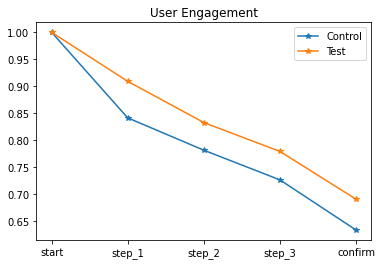

In [ ]:
#Creating visualization
plt.plot(df_final_metrics_conversion_ratio.Steps,df_final_metrics_conversion_ratio.Control,label="Control",marker='*')
plt.plot(df_final_metrics_conversion_ratio.Steps,df_final_metrics_conversion_ratio.test,label="Test",marker='*')
plt.legend()
plt.title("User Engagement")
plt.show()

# Validating if we can run Z statistics




In order to qualify for hypothesis testing, our dataset should quality for below mentioned conditions

1) Random: The data needs to come from a random sample or randomized experiment.
- We have seen bar graphs of test and control group represents client data in same propotions by age, tenure. Hence, it is safe to assume that test and control group have records as a random sample, and it represents population.

2) Normal: The sampling distribution of  p hat  needs to be approximately normal — needs at least 10 expected successes and 10 expected failures.
- We see that nconversion rate for both the group is way greater than 10.
- Test group conversion 15530 users
- Control group conversion 11345 users
- Also, non conversion is also fignificant higher


# Finding out Z score



null hypothesis : H0= Test group conversion rate = Control group conversion rate

Alternate hypothesis HA: Test group conversion rate > Control group conversion rate

Taking confidence level 95%
Hence, alpha= 0.05


In [ ]:
# Creating Z statistics and P statistics

n_con=df_final_metrics_conversion[df_final_metrics_conversion.Steps=='start'].Control.iloc[0]
n_test=df_final_metrics_conversion[df_final_metrics_conversion.Steps=='start'].test.iloc[0]
successes=[df_final_metrics_conversion[df_final_metrics_conversion.Steps=='confirm'].test.iloc[0], 
           df_final_metrics_conversion[df_final_metrics_conversion.Steps=='confirm'].Control.iloc[0]]
nobs=[n_test,n_con]

nobs=[n_test,n_con]

z_stat,pval=proportions_ztest(successes,nobs=nobs,alternative='larger')
(lower_test,lower_conv),(upper_test,upper_conv)=proportion_confint(successes,nobs=nobs, alpha=0.005)
print("Z value:",z_stat)
print("P Value:",format(pval,".2f"))

print("\n\n\nTest Value range:", lower_test,upper_test )
print("Control Value range:", lower_conv,upper_conv )




Z value: 12.00076468707902
P Value: 0.00



Test Value range: 0.6816039522890585 0.6991953127545796
Control Value range: 0.6231765779491998 0.6433712268201339


Since P value is much smaller than 0.05 significance level, we reject null hypothesis and we conclude that conversion rate for the test group is higher than control group. 

In [ ]:
# Alternate way to find out Z value
# Population
n_control = df_final_metrics_conversion[df_final_metrics_conversion.Steps=='start'].Control.iloc[0]
n_variant = df_final_metrics_conversion[df_final_metrics_conversion.Steps=='start'].test.iloc[0]
print (n_control,n_variant)
# Conversion rate
crv_control = df_final_metrics_conversion[df_final_metrics_conversion.Steps=='confirm'].Control.iloc[0]/df_final_metrics_conversion[df_final_metrics_conversion.Steps=='start'].Control.iloc[0]
crv_variant = df_final_metrics_conversion[df_final_metrics_conversion.Steps=='confirm'].test.iloc[0]/df_final_metrics_conversion[df_final_metrics_conversion.Steps=='start'].test.iloc[0]
print (crv_control,crv_variant)
var_control = crv_control * (1-crv_control) 
var_variant = crv_variant * (1-crv_variant)

conversions_control = crv_control * n_control
conversions_variant = crv_variant * n_variant
print('N - Control: {:0.0f} , Variant: {:0.0f}'.format(n_control, n_variant))
print('CRV - Control: {:0.4f} , Variant: {:0.4f}'.format(crv_control, crv_variant))
print('Conversions -  Control: {:0.0f} , Variant: {:0.0f}'.format(conversions_control, conversions_variant))
print('Var -  Control: {:0.4f} , Variant: {:0.4f}'.format(var_control, var_variant))

# Create combined random variable S
mean_control = crv_control
mean_variant = crv_variant
S_mean = mean_variant - mean_control
S_var = (var_control/n_control) + (var_variant/n_variant)

print('------------')
Z_score = S_mean / np.sqrt(S_var)
print('Z-score: {:0.4f}'.format(Z_score))

17948 21770
0.6332739023846669 0.690399632521819
N - Control: 17948 , Variant: 21770
CRV - Control: 0.6333 , Variant: 0.6904
Conversions -  Control: 11366 , Variant: 15030
Var -  Control: 0.2322 , Variant: 0.2137
------------
Z-score: 11.9747


In [ ]:
# Finding P value
p_value_1_tail = 1-st.norm.cdf(2.6534)
print('p-value: {:0.6f}'.format(p_value_1_tail))

p-value: 0.003984


# P Value corrosponding to Z=11.97 is around 0.004. Since P value is much smaller than 0.05 significance level, we reject null hypothesis and we conclude that conversion rate for the test group is higher than control group. 